In [1]:
from google.cloud import bigquery
from google.oauth2 import service_account
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen
import json
import os
import datetime
import plotly.express as px
from statsmodels.tsa.arima.model import ARIMA
import math
from sklearn.metrics import mean_squared_error
from pmdarima.arima import auto_arima
import datetime
import matplotlib.dates as dates
import statsmodels.api as sm
from datetime import datetime

In [2]:
from pmdarima.arima import auto_arima
import statsmodels.api as sm


In [3]:
credentials = service_account.Credentials.from_service_account_file(
'chain-coders-5d47d58b2c33.json')

project_id = 'chain-coders'
client = bigquery.Client(credentials= credentials,project=project_id)

datasets = client.list_datasets()
for dataset in datasets:
  did = dataset.dataset_id
  # Optional to verify that you are able to access the datasets.
  # The datasets we care about are mimiciii_clinical and mimiciii_notes.
  print(did)


redfin


In [174]:
query = """SELECT * FROM `redfin.redfin-data-state` """

In [175]:
df = client.query(query).to_dataframe()

In [6]:
states = df.state_code.unique()
property_types = df.property_type_id.unique()
period_dates = df.period_end.unique()

In [ ]:
queryx = """SELECT * FROM `redfin.redfin-data-state` """
dfx = client.query(query).to_dataframe()

In [ ]:
dfx.sort_values('period_end')[['property_type', 'property_type_id']]

In [42]:
for state in states[13:14]:
        mask1 = df['state_code'] ==state
        #mask2 = df['property_type_id'] == property_type
        df_sar = df[mask1 ]
        df_sar = df_sar[['median_ppsf', 'period_end']]
        df_sar = df_sar.set_index('period_end')
        df_sar.index = pd.to_datetime(df_sar.index)
        ts = df_sar.resample('m').mean().astype('Float64')
        #print(ts.sort_values('period_end').to_string())


In [ ]:
import matplotlib.dates as dates



In [ ]:
period_dates.max() 

In [46]:
#Creating a test date set of future dates
ts_test_future=ts_test
ts_test_future.index=ts_test_future.index+pd.DateOffset(years=3)

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


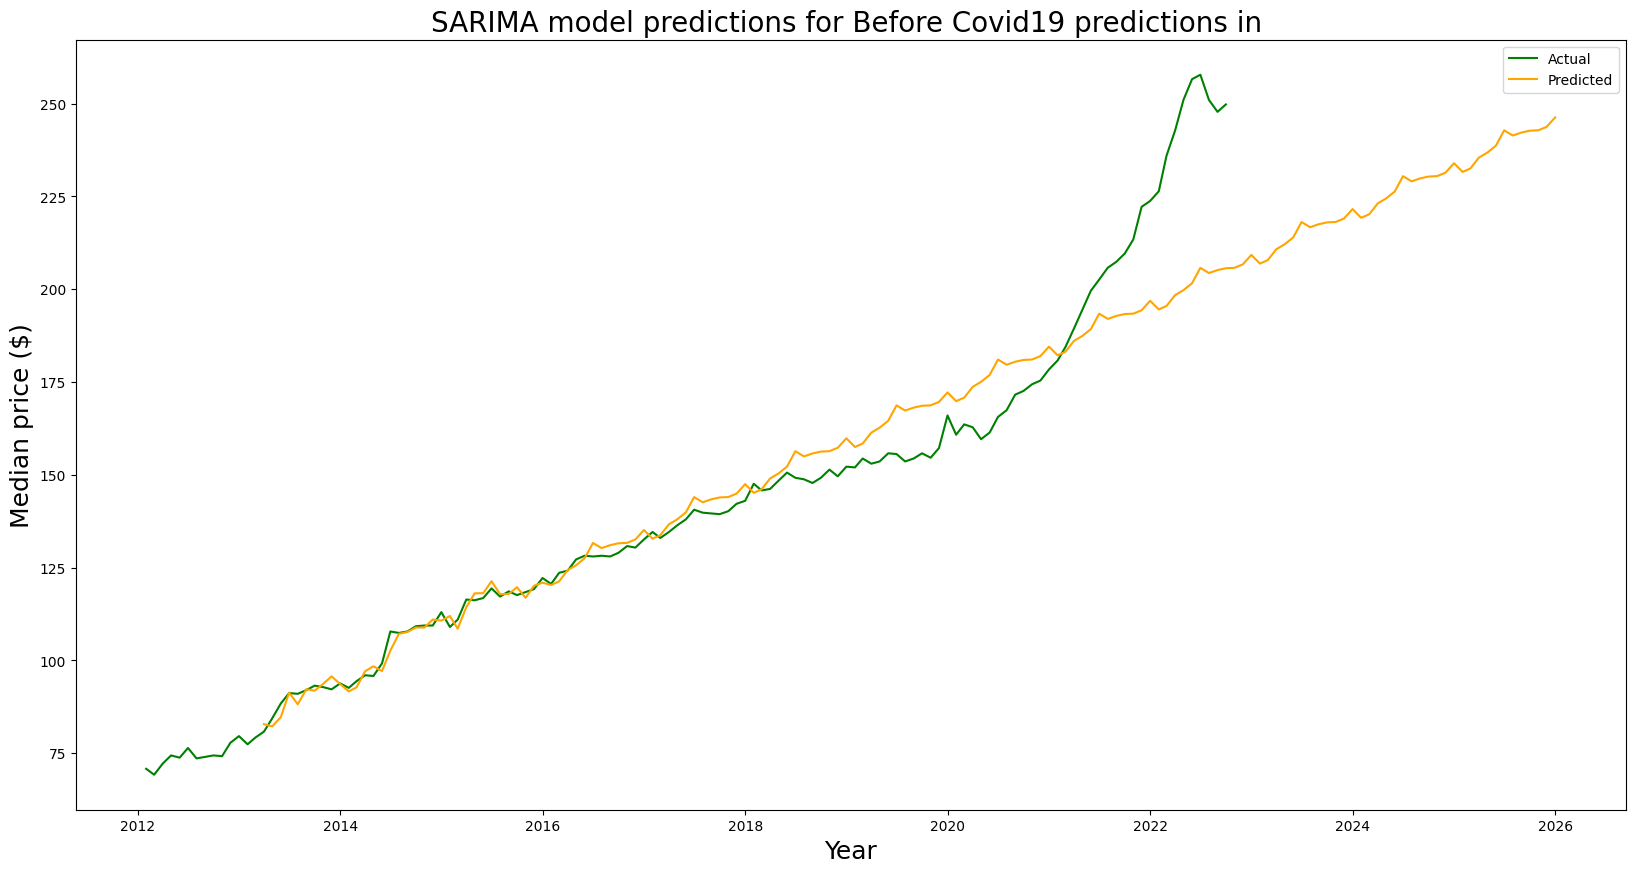

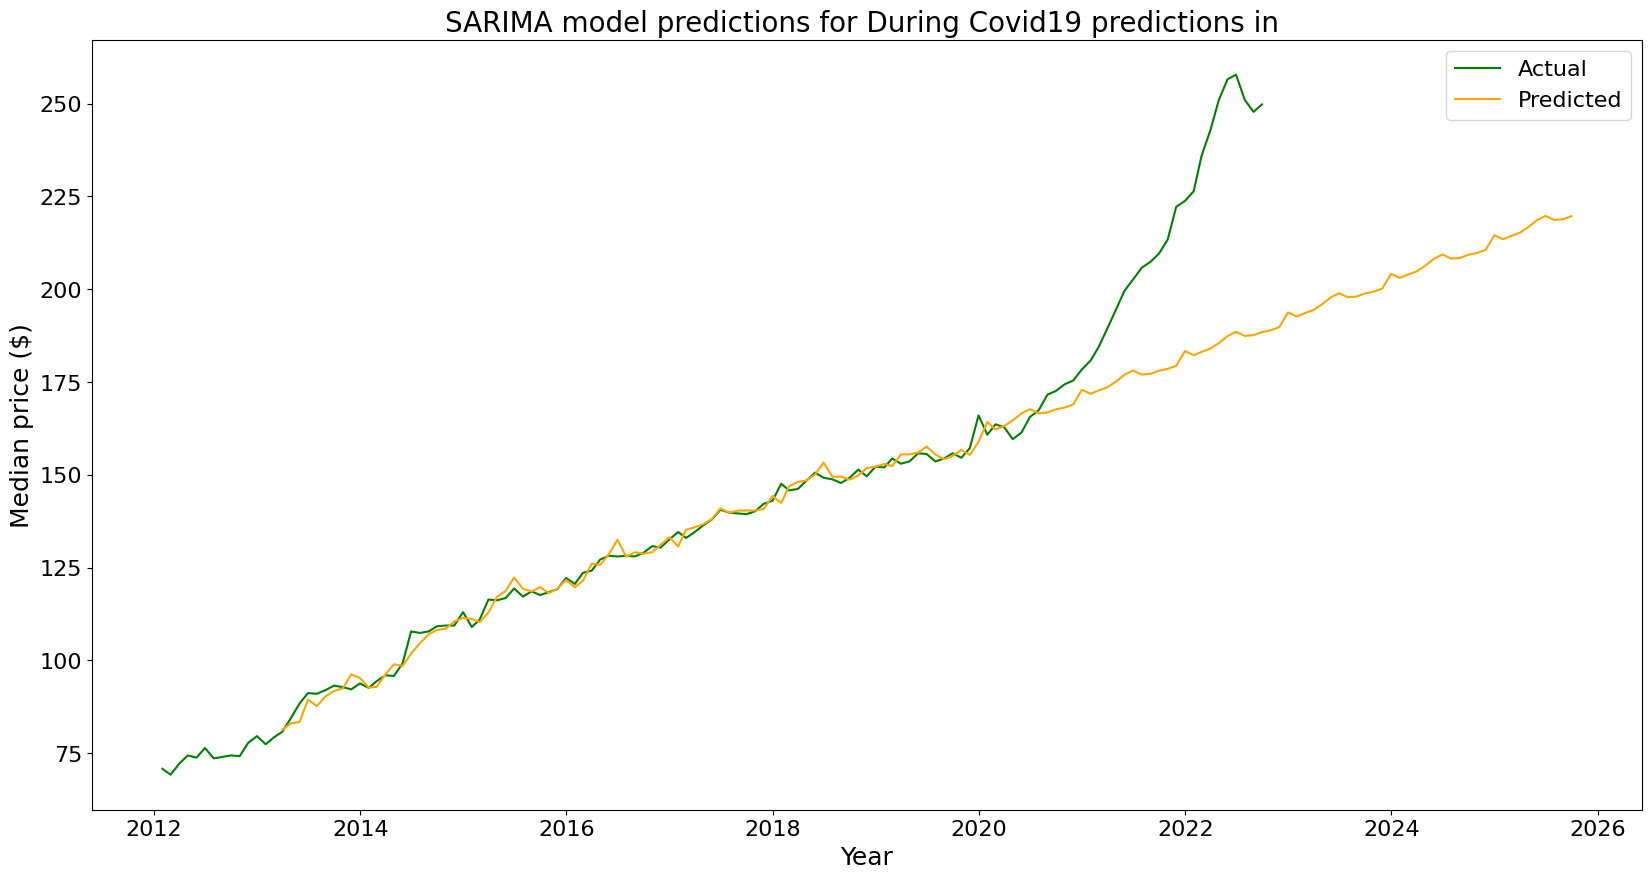

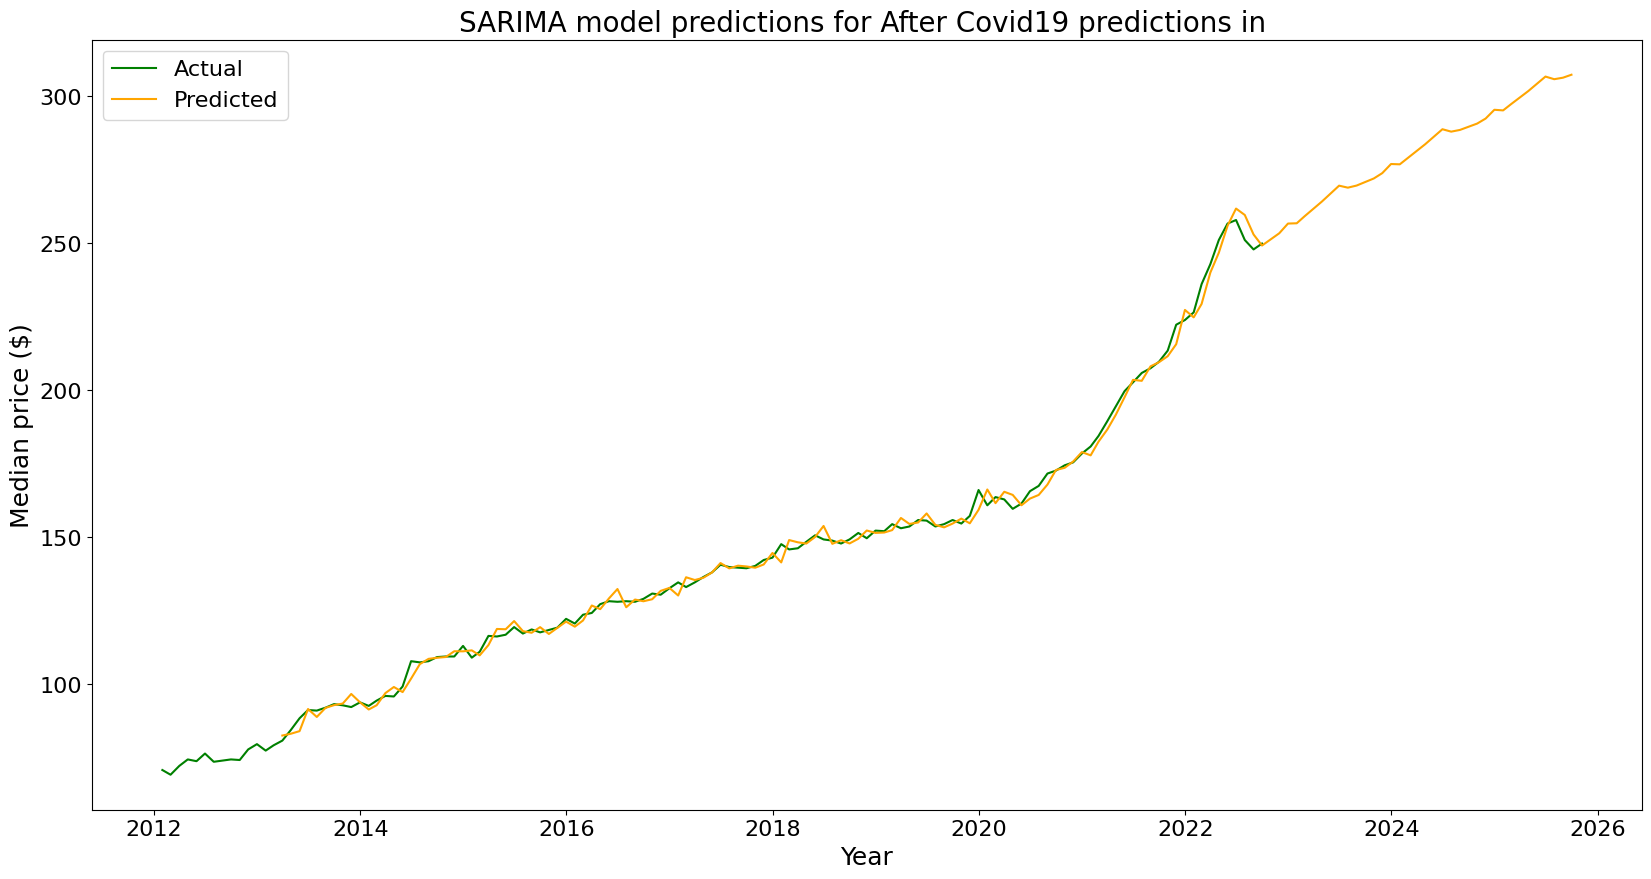

In [47]:
#SARIMA model:Pre-Covid19
ts_train_bc=ts[ts.index[0]:( ts.index[ts.index.get_loc('2016-01-31', method='nearest')])]#valid
ts_train_dc=ts[ts.index[0]:( ts.index[ts.index.get_loc('2020-01-31', method='nearest')])]#analysis
ts_train_ac=ts[ts.index[0]:( ts.index[ts.index.get_loc('2023-01-31', method='nearest')])]#invest

fit_bc = sm.tsa.statespace.SARIMAX(ts_train_bc.astype(float), order=(1, 1, 1),seasonal_order=(0,1,1,12)).fit(disp=False)
fit_dc = sm.tsa.statespace.SARIMAX(ts_train_dc.astype(float), order=(1, 1, 1),seasonal_order=(0,1,1,12)).fit(disp=False)
fit_ac = sm.tsa.statespace.SARIMAX(ts_train_ac.astype(float), order=(1, 1, 1),seasonal_order=(0,1,1,12)).fit(disp=False)

ts_predicted_bc = fit_bc.predict(start='2013-03-31',end='2025-12-31')
ts_predicted_dc = fit_dc.predict(start='2013-03-31',end=ts_test_future.index[-1])
ts_predicted_ac = fit_ac.predict(start='2013-03-31',end=ts_test_future.index[-1])

plotSarima( ts , ts_predicted_bc, 'Before Covid19 predictions')
plotSarima( ts , ts_predicted_dc, 'During Covid19 predictions')
plotSarima( ts , ts_predicted_ac, 'After Covid19 predictions')


In [45]:
y_hat_avg_future = ts_test_future.copy()
fit_future = sm.tsa.statespace.SARIMAX(ts.astype(float), order=(1, 1, 1),seasonal_order=(0,1,1,12)).fit()
y_hat_avg_future['SARIMA'] = fit_future.predict(start=ts_test_future.index[0],end=ts_test_future.index[-1])

NameError: name 'ts_test_future' is not defined

In [ ]:
plt.figure(figsize=(20,10))
plt.plot( ts, label='Train')
plt.plot(y_hat_avg_future['SARIMA'], label='..', color='g')
plt.legend(loc='best')
plt.xlabel("Year", fontsize='18')
plt.xlim(dates.date2num([ts_train.index[0], ts_test_future.index[-1]]))
plt.ylabel("Mean Price (£)", fontsize='18')
plt.title("Future predictions with SARIMA model: my parameters", fontsize='20')

plt.legend(loc='best')
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)
plt.show()

In [7]:
#Train-test split, 20 years of training data and 5 years of test data
ts_train=ts[ts.index[0]:( ts.index[ts.index.get_loc('2016-12-31', method='nearest')])]
ts_test=ts[ ts.index[ts.index.get_loc('2010-12-31', method='nearest')]:ts.index[ts.index.get_loc('2022-12-31', method='nearest')]]

NameError: name 'ts' is not defined

In [ ]:
#SARIMA
y_hat_avg1 = ts_test.copy()
fit3 = sm.tsa.statespace.SARIMAX(ts_train.astype(float), order=(1, 1, 1),seasonal_order=(0,1,1,12)).fit()
y_hat_avg1['SARIMA'] = fit3.predict(start=ts_test.index[0],end=ts_test.index[-1])
plt.figure(figsize=(20,10))
plt.plot( ts_train, label='Train')
plt.plot(ts_test, label='Test')
plt.plot(y_hat_avg1['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.xlabel("Year", fontsize='18')
plt.xlim(dates.date2num([ts_train.index[0], ts_test.index[-1]]))
plt.ylabel("Mean price (£)", fontsize='18')
plt.title("SARIMA model: my parameters", fontsize='20')

plt.legend(loc='best')
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)
plt.show()

In [ ]:
ts_train=ts[ts.index[0]:( ts.index[ts.index.get_loc('2019-12-31', method='nearest')])]
ts_test=ts[ts.index[ts.index.get_loc('2012-12-31', method='nearest')]:ts.index[-1]]


In [ ]:
#SARIMA
y_hat_avg1 = ts_test.copy()
fit3 = sm.tsa.statespace.SARIMAX(ts_train.astype(float), order=(1, 1, 1),seasonal_order=(0,1,1,12)).fit()
y_hat_avg_future['SARIMA'] = fit_future.predict(start=ts_test_future.index[0],end=ts_test_future.index[-1])

In [ ]:
import matplotlib.dates as dates

y_hat_avg1['SARIMA'] = fit3.predict(start=ts_test.index[0],end=ts_test.index[-1])

plotSarima



In [8]:
property_dict ={4:'Multi_Family' , -1 : "All_Residential" , 13:"Townhouse" , 3:"Condo", 6:"Single_Family_Residential"}

In [9]:
def plotSarima( actual , predicted, property_type ='' , state = ''):
    plt.figure(figsize=(20,10))
    plt.plot(actual.astype(float), label='Actual', color = 'green')
    plt.plot(predicted, label='Predicted', color = 'orange')
    plt.legend(loc='best')
    plt.xlabel("Year", fontsize='18')
    #plt.xlim(dates.date2num([actual.index[0], predicted.index[-1]]))
    plt.ylabel("Median price ($)", fontsize='18')
    plt.title("SARIMA model predictions for "+property_type +" in "+state, fontsize='20')

    plt.legend(loc='best')
    font = {
            'weight' : 'normal',
            'size'   : 16}
    plt.rc('font', **font)
    #plt.show()
    plt.savefig("sarima_states_covid/"+property_type+"@"+state+".png")

In [170]:
df_pred = pd.DataFrame()
cols = ['state_code', 'property_type_id', 'period_end']

In [171]:
for state in states:
    for property_type in property_types:
        #print("Predicting for ", state, property_type)
        mask1 = df['state_code'] ==state
        mask2 = df['property_type_id'] == property_type

        df_out = df[mask1 & mask2]
        df_sar = df_out[['median_ppsf', 'period_end']]
        df_sar = df_sar.set_index('period_end')
        df_sar.index = pd.to_datetime(df_sar.index)
        ts = df_sar.resample('m').mean().fillna(method='ffill')
        if (ts.shape[0] < 50):
            print(" ###################. Not enough data for ", state, property_type)
            continue

        ts_train_ac=ts
        ts_train_bc=ts[ts.index[0]:( ts.index[ts.index.get_loc('2020-01-31', method='nearest')])]

        fit_ac = sm.tsa.statespace.SARIMAX(ts_train_ac.astype(float), order=(1, 1, 1),seasonal_order=(0,1,1,12)).fit(disp=False)
        fit_bc = sm.tsa.statespace.SARIMAX(ts_train_bc.astype(float), order=(1, 1, 1),seasonal_order=(0,1,1,12)).fit(disp=False)

        ts_predicted_bc = fit_bc.predict(start=ts_train_bc.index[0],end='2025-12-31')
        ts_predicted_ac = fit_ac.predict(start=ts_train_ac.index[0],end='2025-12-31')

        pred_bc = pd.Series(ts_predicted_bc, name='ppsf_wo_covid').to_frame()
        pred_ac = pd.Series(ts_predicted_ac, name='ppsf_w_covid').to_frame()
        pred = pd.merge(pred_bc,pred_ac,  how='outer', left_index= True, right_index= True)

        
        pred['state_code'] = state
        pred['property_type_id'] = property_type
        pred = pred.reset_index().rename(columns={'index': 'period_end'})
        pred['period_end']=pred['period_end'].astype(str)
        pred['combined'] = pred[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

        if  df_pred.empty:
            df_pred = pred
        else:
            df_pred = df_pred.append(pred)

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
/usr/local/lib/python3.7/site-packag

 ###################. Not enough data for  AK 13


/usr/local/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax

 ###################. Not enough data for  WV 3


In [173]:
df_pred

,period_end,ppsf_wo_covid,ppsf_w_covid,state_code,property_type_id,combined
0,2012-01-31,0.000000,0.000000,IA,3,IA_3_2012-01-31
1,2012-02-29,85.998937,85.998995,IA,3,IA_3_2012-02-29
2,2012-03-31,84.000028,84.000120,IA,3,IA_3_2012-03-31
3,2012-04-30,87.999902,87.999898,IA,3,IA_3_2012-04-30
4,2012-05-31,94.999825,94.999844,IA,3,IA_3_2012-05-31
...,...,...,...,...,...,...
163,2025-08-31,130.008422,176.977132,WV,-1,WV_-1_2025-08-31
164,2025-09-30,131.133386,177.249852,WV,-1,WV_-1_2025-09-30
165,2025-10-31,130.508115,178.558072,WV,-1,WV_-1_2025-10-31
166,2025-11-30,129.629852,177.045532,WV,-1,WV_-1_2025-11-30


In [176]:
df_orig = df.copy()
df_orig['combined'] = df_orig[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
df_orig = df_orig.set_index('combined')
df_pred= df_pred.set_index('combined')

In [177]:
df_merged = pd.merge(df_pred,df_orig,  how='outer', left_index= True, right_index= True, suffixes=('', '_y'))
df_merged.drop(df_merged.filter(regex='_y$').columns, axis=1, inplace=True)
df_merged

,period_end,ppsf_wo_covid,ppsf_w_covid,state_code,property_type_id,period_begin,period_duration,region_type,region_type_id,table_id,...,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated
combined,,,,,,,,,,,,,,,,,,,,,
AK_-1_2012-01-31,2012-01-31,0.000000,0.000000,AK,-1,2012-01-01,30,state,4,3,...,0.004806,NaN,NaN,NaN,0.072267,0.038627,-0.032745,West Region,None,2022-10-16 14:38:00+00:00
AK_-1_2012-02-29,2012-02-29,138.999158,138.999388,AK,-1,2012-02-01,30,state,4,3,...,-0.013156,NaN,NaN,NaN,0.141018,0.068751,-0.005905,West Region,None,2022-10-16 14:38:00+00:00
AK_-1_2012-03-31,2012-03-31,139.000043,139.000051,AK,-1,2012-03-01,30,state,4,3,...,0.043301,NaN,NaN,NaN,0.077959,-0.063059,-0.050997,West Region,None,2022-10-16 14:38:00+00:00
AK_-1_2012-04-30,2012-04-30,142.999949,142.999960,AK,-1,2012-04-01,30,state,4,3,...,-0.000719,NaN,NaN,NaN,0.104815,0.026856,0.014697,West Region,None,2022-10-16 14:38:00+00:00
AK_-1_2012-05-31,2012-05-31,143.000003,143.000003,AK,-1,2012-05-01,30,state,4,3,...,-0.021768,NaN,NaN,NaN,0.068853,-0.035962,-0.012486,West Region,None,2022-10-16 14:38:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WV_6_2025-08-31,2025-08-31,135.310991,184.683275,WV,6,NaT,<NA>,NaN,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
WV_6_2025-09-30,2025-09-30,136.435983,184.319467,WV,6,NaT,<NA>,NaN,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
WV_6_2025-10-31,2025-10-31,136.310974,186.599418,WV,6,NaT,<NA>,NaN,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [188]:
df_merged["covid_impact"] = 100*((df_merged["ppsf_w_covid"]-df_merged["ppsf_wo_covid"])/df_merged["ppsf_wo_covid"])

In [189]:
df_merged

,period_end,ppsf_wo_covid,ppsf_w_covid,state_code,property_type_id,period_begin,period_duration,region_type,region_type_id,table_id,...,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated,covid_impact
combined,,,,,,,,,,,,,,,,,,,,,
AK_-1_2012-01-31,2012-01-31,0.000000,0.000000,AK,-1,2012-01-01,30,state,4,3,...,NaN,NaN,NaN,0.072267,0.038627,-0.032745,West Region,None,2022-10-16 14:38:00+00:00,NaN
AK_-1_2012-02-29,2012-02-29,138.999158,138.999388,AK,-1,2012-02-01,30,state,4,3,...,NaN,NaN,NaN,0.141018,0.068751,-0.005905,West Region,None,2022-10-16 14:38:00+00:00,1.650538e-04
AK_-1_2012-03-31,2012-03-31,139.000043,139.000051,AK,-1,2012-03-01,30,state,4,3,...,NaN,NaN,NaN,0.077959,-0.063059,-0.050997,West Region,None,2022-10-16 14:38:00+00:00,6.268371e-06
AK_-1_2012-04-30,2012-04-30,142.999949,142.999960,AK,-1,2012-04-01,30,state,4,3,...,NaN,NaN,NaN,0.104815,0.026856,0.014697,West Region,None,2022-10-16 14:38:00+00:00,7.725136e-06
AK_-1_2012-05-31,2012-05-31,143.000003,143.000003,AK,-1,2012-05-01,30,state,4,3,...,NaN,NaN,NaN,0.068853,-0.035962,-0.012486,West Region,None,2022-10-16 14:38:00+00:00,5.281932e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WV_6_2025-08-31,2025-08-31,135.310991,184.683275,WV,6,NaT,<NA>,NaN,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,3.648801e+01
WV_6_2025-09-30,2025-09-30,136.435983,184.319467,WV,6,NaT,<NA>,NaN,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,3.509594e+01
WV_6_2025-10-31,2025-10-31,136.310974,186.599418,WV,6,NaT,<NA>,NaN,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,3.689244e+01


In [ ]:
job = client.load_table_from_dataframe(
    df_merged, table_id, job_config=job_config
)